# Chapter 23: A framework for comparison

For additional context see chapter 23 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [31]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc
from process_improvement import network_analysis as na

%matplotlib inline

In [32]:
# Dataset url
ratio_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'

# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
ratio_df = get_data(ratio_url)

# Drop 'Note' column
ratio_df.drop(columns='Note')
# Make 'Year' column dtype string
ratio_df['Year'] = ratio_df['Year'].astype('string')

# Show head of df
ratio_df.head()

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Vienna General Hospital,1784,284,6,2.1,No pathological anatomy
1,Vienna General Hospital,1785,899,13,1.4,NaN
2,Vienna General Hospital,1786,1151,5,0.4,NaN
3,Vienna General Hospital,1787,1407,5,0.4,NaN
4,Vienna General Hospital,1788,1425,5,0.4,NaN


## Split dataframe by hospital

In [33]:
# Split dataframe into Vienna General (vg) and Dublin General (dg)
vienna = ratio_df[ratio_df['Hospital'] == 'Vienna General Hospital']
dublin = ratio_df[ratio_df['Hospital'] == 'Dublin Maternity Hospital'].reset_index(drop=True)

## Fig 23.3: Temporal comparison of Dublin data

For this temporal comparison we will isolate the first 10 years in the Dublin dataset and the last 10 years of the Dublin dataset as unique dataframes.

In [34]:
# Get the first 10 years of data from Dublin
dublin_first_10 = dublin.head(10)
dublin_first_10

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Dublin Maternity Hospital,1784,1261,11,0.9,NaN
1,Dublin Maternity Hospital,1785,1292,8,0.6,NaN
2,Dublin Maternity Hospital,1786,1351,8,0.6,NaN
3,Dublin Maternity Hospital,1787,1347,10,0.7,NaN
4,Dublin Maternity Hospital,1788,1469,23,1.6,NaN
5,Dublin Maternity Hospital,1789,1435,25,1.7,NaN
6,Dublin Maternity Hospital,1790,1546,12,0.8,NaN
7,Dublin Maternity Hospital,1791,1602,25,1.6,NaN
8,Dublin Maternity Hospital,1792,1631,10,0.6,NaN
9,Dublin Maternity Hospital,1793,1747,19,1.1,NaN


In [35]:
# Get the last 10 years of data from Dublin
dublin_last_10 = dublin.iloc[47:57].reset_index(drop=True)
dublin_last_10

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Dublin Maternity Hospital,1831,2176,12,0.6,NaN
1,Dublin Maternity Hospital,1832,2242,12,0.5,NaN
2,Dublin Maternity Hospital,1833,2138,12,0.6,NaN
3,Dublin Maternity Hospital,1834,2024,34,1.7,NaN
4,Dublin Maternity Hospital,1835,1902,34,1.8,NaN
5,Dublin Maternity Hospital,1836,1810,36,2.0,NaN
6,Dublin Maternity Hospital,1837,1833,24,1.3,NaN
7,Dublin Maternity Hospital,1838,2126,45,2.1,NaN
8,Dublin Maternity Hospital,1839,1951,25,1.3,NaN
9,Dublin Maternity Hospital,1840,1521,26,1.7,NaN


In [36]:
# Create list of dataframes
dublin_list = [dublin_first_10, dublin_last_10]
# Create label list
dublin_label_list = ['Dublin - 1784 to 1793','Dublin - 1831 to 1840']

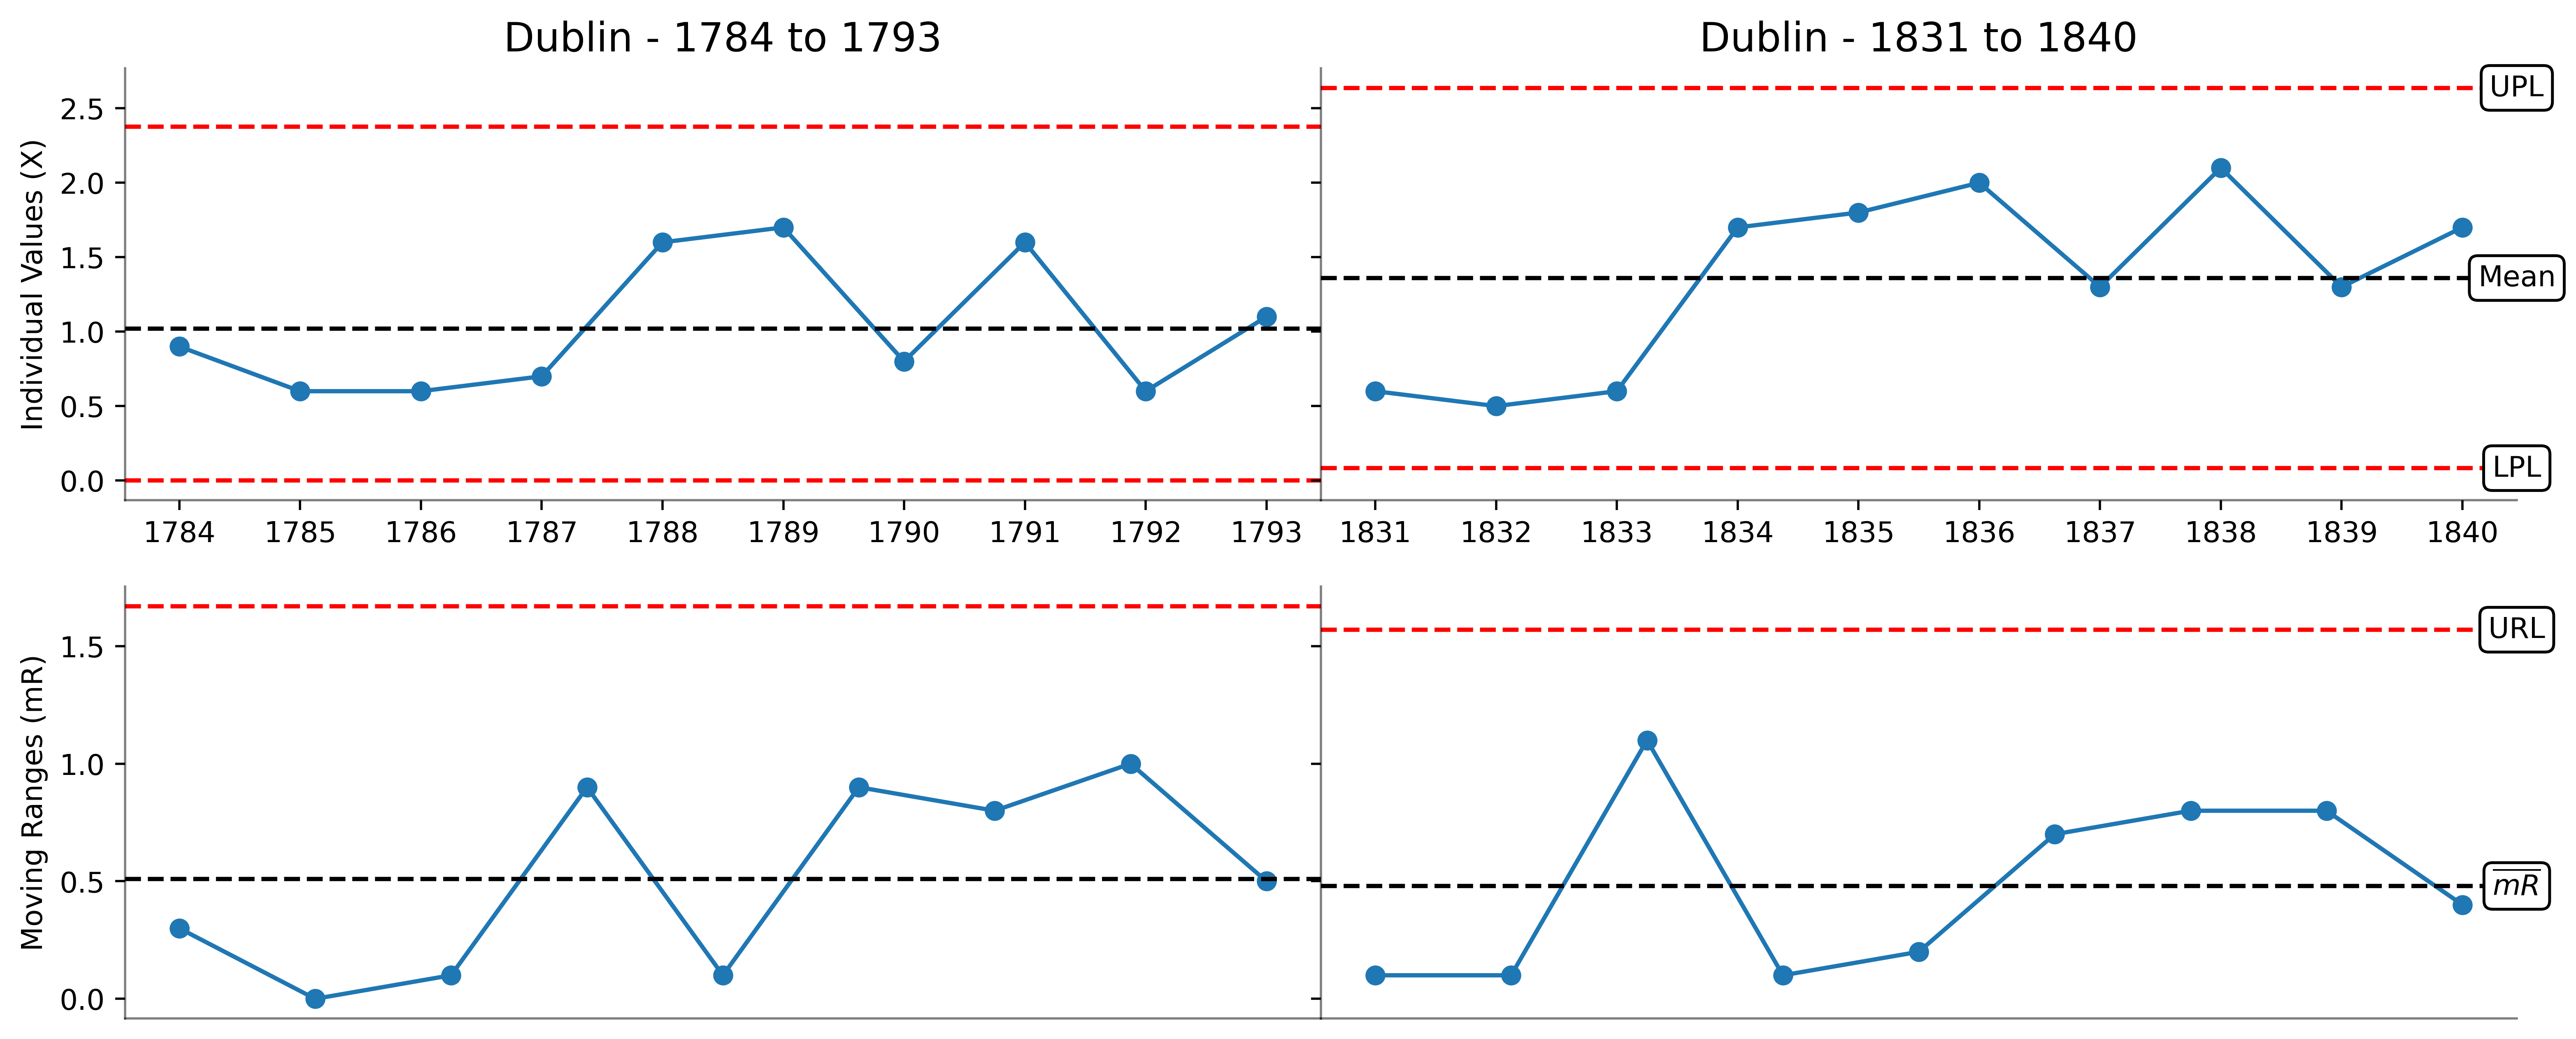

In [37]:
dublin_comparison_results = cc.xmr_comparison(dublin_list, 
                                              'Death-to-Birth Ratio', 
                                              'Year',
                                              dublin_label_list, 
                                              tickinterval=1)

In [38]:
# Show results for Dublin comparison
dublin_comparison_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Dublin - 1784 to 1793,1.02,0.51,2.3766,0.0000,1.67,2.3766,Predictable
1,Dublin - 1831 to 1840,1.36,0.48,2.6368,0.0832,1.57,2.5536,Predictable


## Fig 23.4: Temporal comparison of Vienna data

For this temporal comparison we will isolate the first 10 years in the Vienna dataset and the 10 years spanning 1831 to 1840 from the Vienna data.

In [39]:
# Get the first 10 years of data from Vienna
vienna_first_10 = vienna.head(10)
vienna_first_10

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Vienna General Hospital,1784,284,6,2.1,No pathological anatomy
1,Vienna General Hospital,1785,899,13,1.4,NaN
2,Vienna General Hospital,1786,1151,5,0.4,NaN
3,Vienna General Hospital,1787,1407,5,0.4,NaN
4,Vienna General Hospital,1788,1425,5,0.4,NaN
5,Vienna General Hospital,1789,1246,7,0.6,NaN
6,Vienna General Hospital,1790,1326,10,0.8,NaN
7,Vienna General Hospital,1791,1395,8,0.6,NaN
8,Vienna General Hospital,1792,1579,14,0.9,NaN
9,Vienna General Hospital,1793,1684,44,2.6,NaN


In [40]:
# Get the last 10 years of data from Vienna
vienna_last = vienna.loc[47:56].reset_index(drop=True)
vienna_last

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Vienna General Hospital,1831,3353,222,6.6,NaN
1,Vienna General Hospital,1832,3331,105,3.2,NaN
2,Vienna General Hospital,1833,3737,197,5.3,NaN
3,Vienna General Hospital,1834,2657,205,7.7,NaN
4,Vienna General Hospital,1835,2573,143,5.6,NaN
5,Vienna General Hospital,1836,2677,200,7.5,NaN
6,Vienna General Hospital,1837,2765,251,9.1,NaN
7,Vienna General Hospital,1838,2987,91,3.0,NaN
8,Vienna General Hospital,1839,2781,151,5.4,NaN
9,Vienna General Hospital,1840,2889,267,9.2,NaN


In [41]:
# Create list of dataframes
vienna_list = [vienna_first_10, vienna_last]
# Create label list
vienna_label_list = ['Vienna - 1784 to 1793','Vienna - 1831 to 1840']

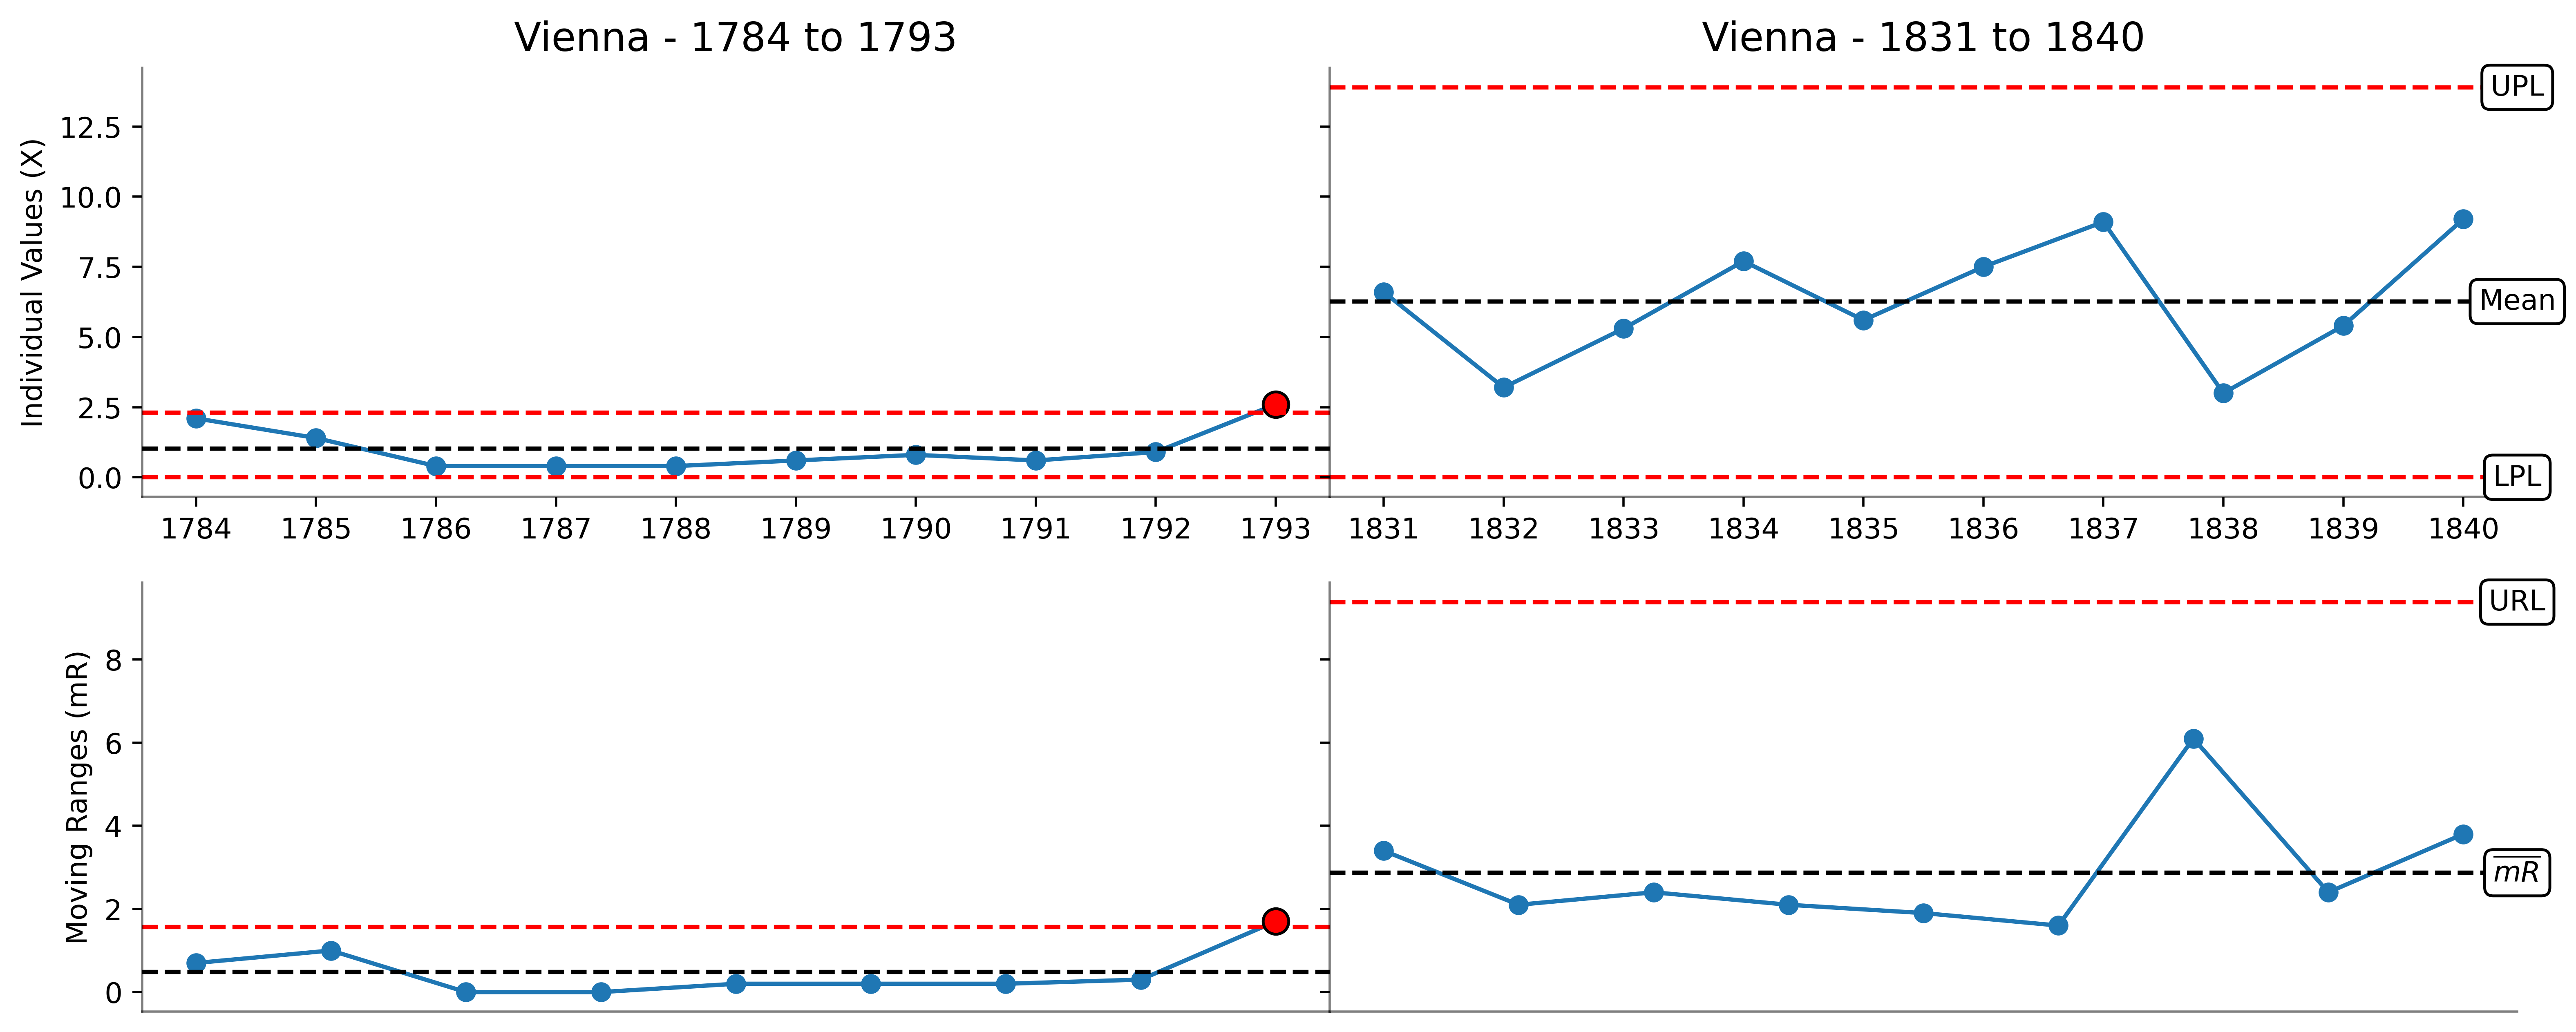

In [42]:
vienna_comparison_results = cc.xmr_comparison(vienna_list, 
                                              'Death-to-Birth Ratio', 
                                              'Year',
                                              vienna_label_list, 
                                              tickinterval=1)

In [43]:
# Show results for Vienna comparison
vienna_comparison_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Vienna - 1784 to 1793,1.02,0.48,2.2968,0,1.57,2.2968,Unpredictable
1,Vienna - 1831 to 1840,6.26,2.87,13.8942,0,9.38,13.8942,Predictable


## Fig 23.5: Physical comparison of Dublin and Vienna

This comparison will use the death-to-birth ratios from the 57 year period  from 1784 to 1840 for both Vienna General and Dublin Maternity Hospital.

In [44]:
# Reduce the original dataframes to the period specified above. 
vienna_1840 = vienna.iloc[:57]
dublin_1840 = dublin.iloc[:57]

# Create list of hospital dataframes
hospital_list = [vienna_1840, dublin_1840]
hospital_label_list = ['Dublin Maternity Hospital', 'Vienna General'] 

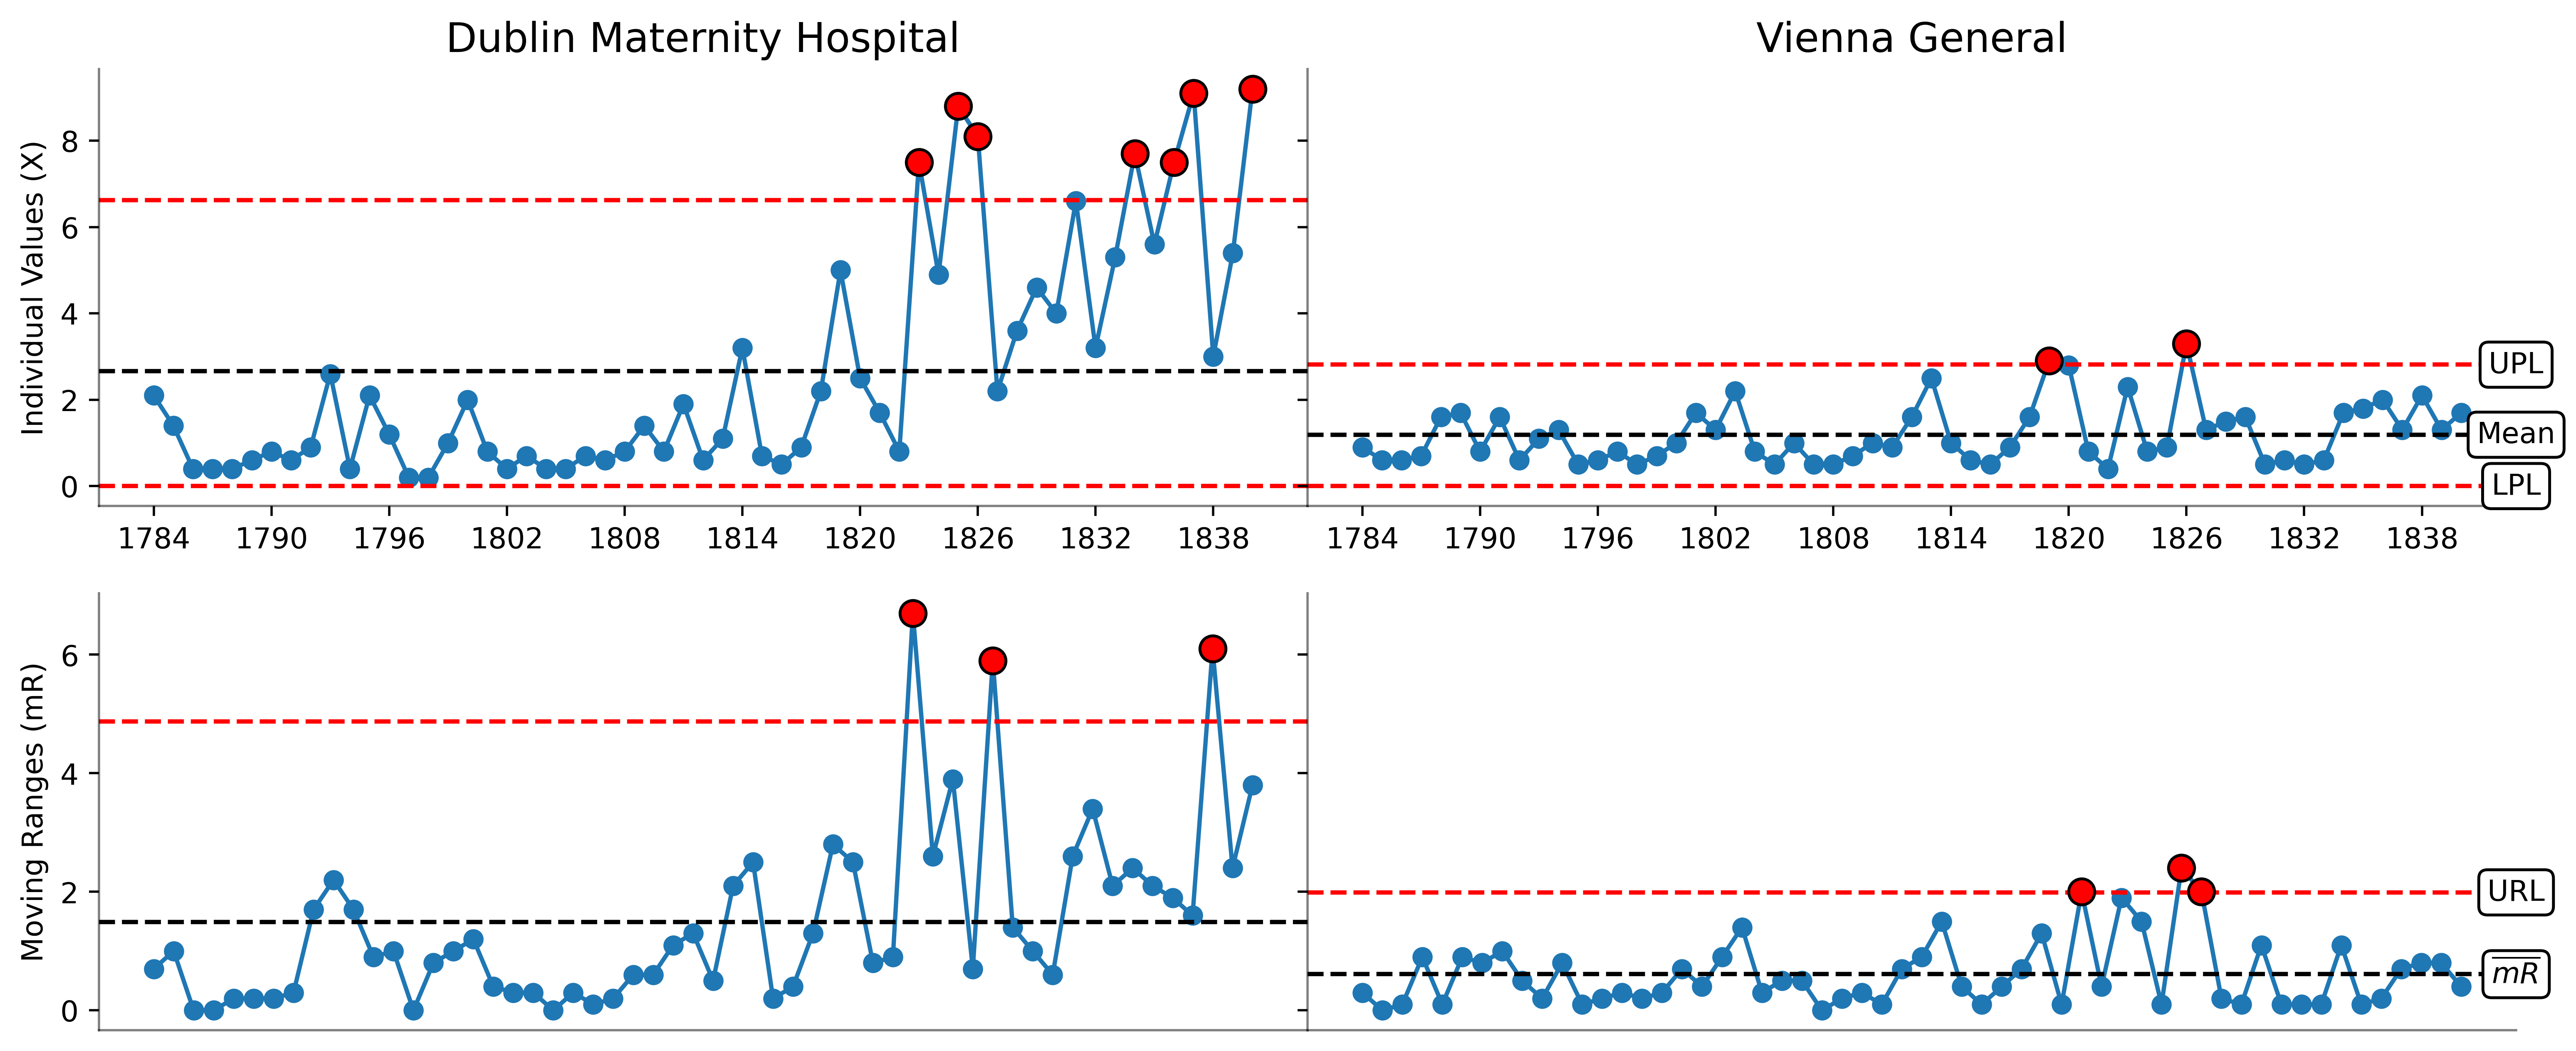

In [45]:
physical_comparison_results = cc.xmr_comparison(hospital_list, 
                                              'Death-to-Birth Ratio', 
                                              'Year',
                                              hospital_label_list, 
                                              tickinterval=6)

In [46]:
# Show comparison results
physical_comparison_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Dublin Maternity Hospital,2.66,1.49,6.6234,0,4.87,6.6234,Unpredictable
1,Vienna General,1.19,0.61,2.8126,0,1.99,2.8126,Unpredictable


## Fig 23.6: Physical comparison of wavines at Anscombe Automotive

In [47]:
# Dataset url
waviness_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/23-anscombe-automotive-part-waviness-data.csv'

# Get data
waviness_df = get_data(waviness_url)

# Make 'Machine Part' column dtype string
waviness_df['Machine Part'] = waviness_df['Machine Part'].astype('string')

# Show df
waviness_df.head()

,Machine,Part Number,Machine Part,Waviness
0,1,1,M1.1,1.34
1,1,2,M1.2,1.32
2,1,3,M1.3,1.31
3,1,4,M1.4,1.30
4,1,5,M1.5,1.30


### Group waviness dataframe by 'Machine'

In [48]:
# Groups for machines
waviness_grouped_df = waviness_df.groupby('Machine')

# Create machine dataframes
M1_df = waviness_grouped_df.get_group(1)
M2_df = waviness_grouped_df.get_group(2).reset_index(drop=True)
M3_df = waviness_grouped_df.get_group(3).reset_index(drop=True)

# Create list of machine dataframes
machine_df_list = [M1_df, M2_df, M3_df]
machine_df_labels = ['M1', 'M2', 'M3']

# Add 'Moving Ranges' column to each dataframe
for i in range(len(machine_df_list)):
    machine_df_list[i] = machine_df_list[i].copy() # Ensure copy
    machine_df_list[i].loc[:, 'Moving Ranges'] = abs(machine_df_list[i]['Waviness'].diff())

### Fig 23.6: XmR Charts comparing three machines producing the same part

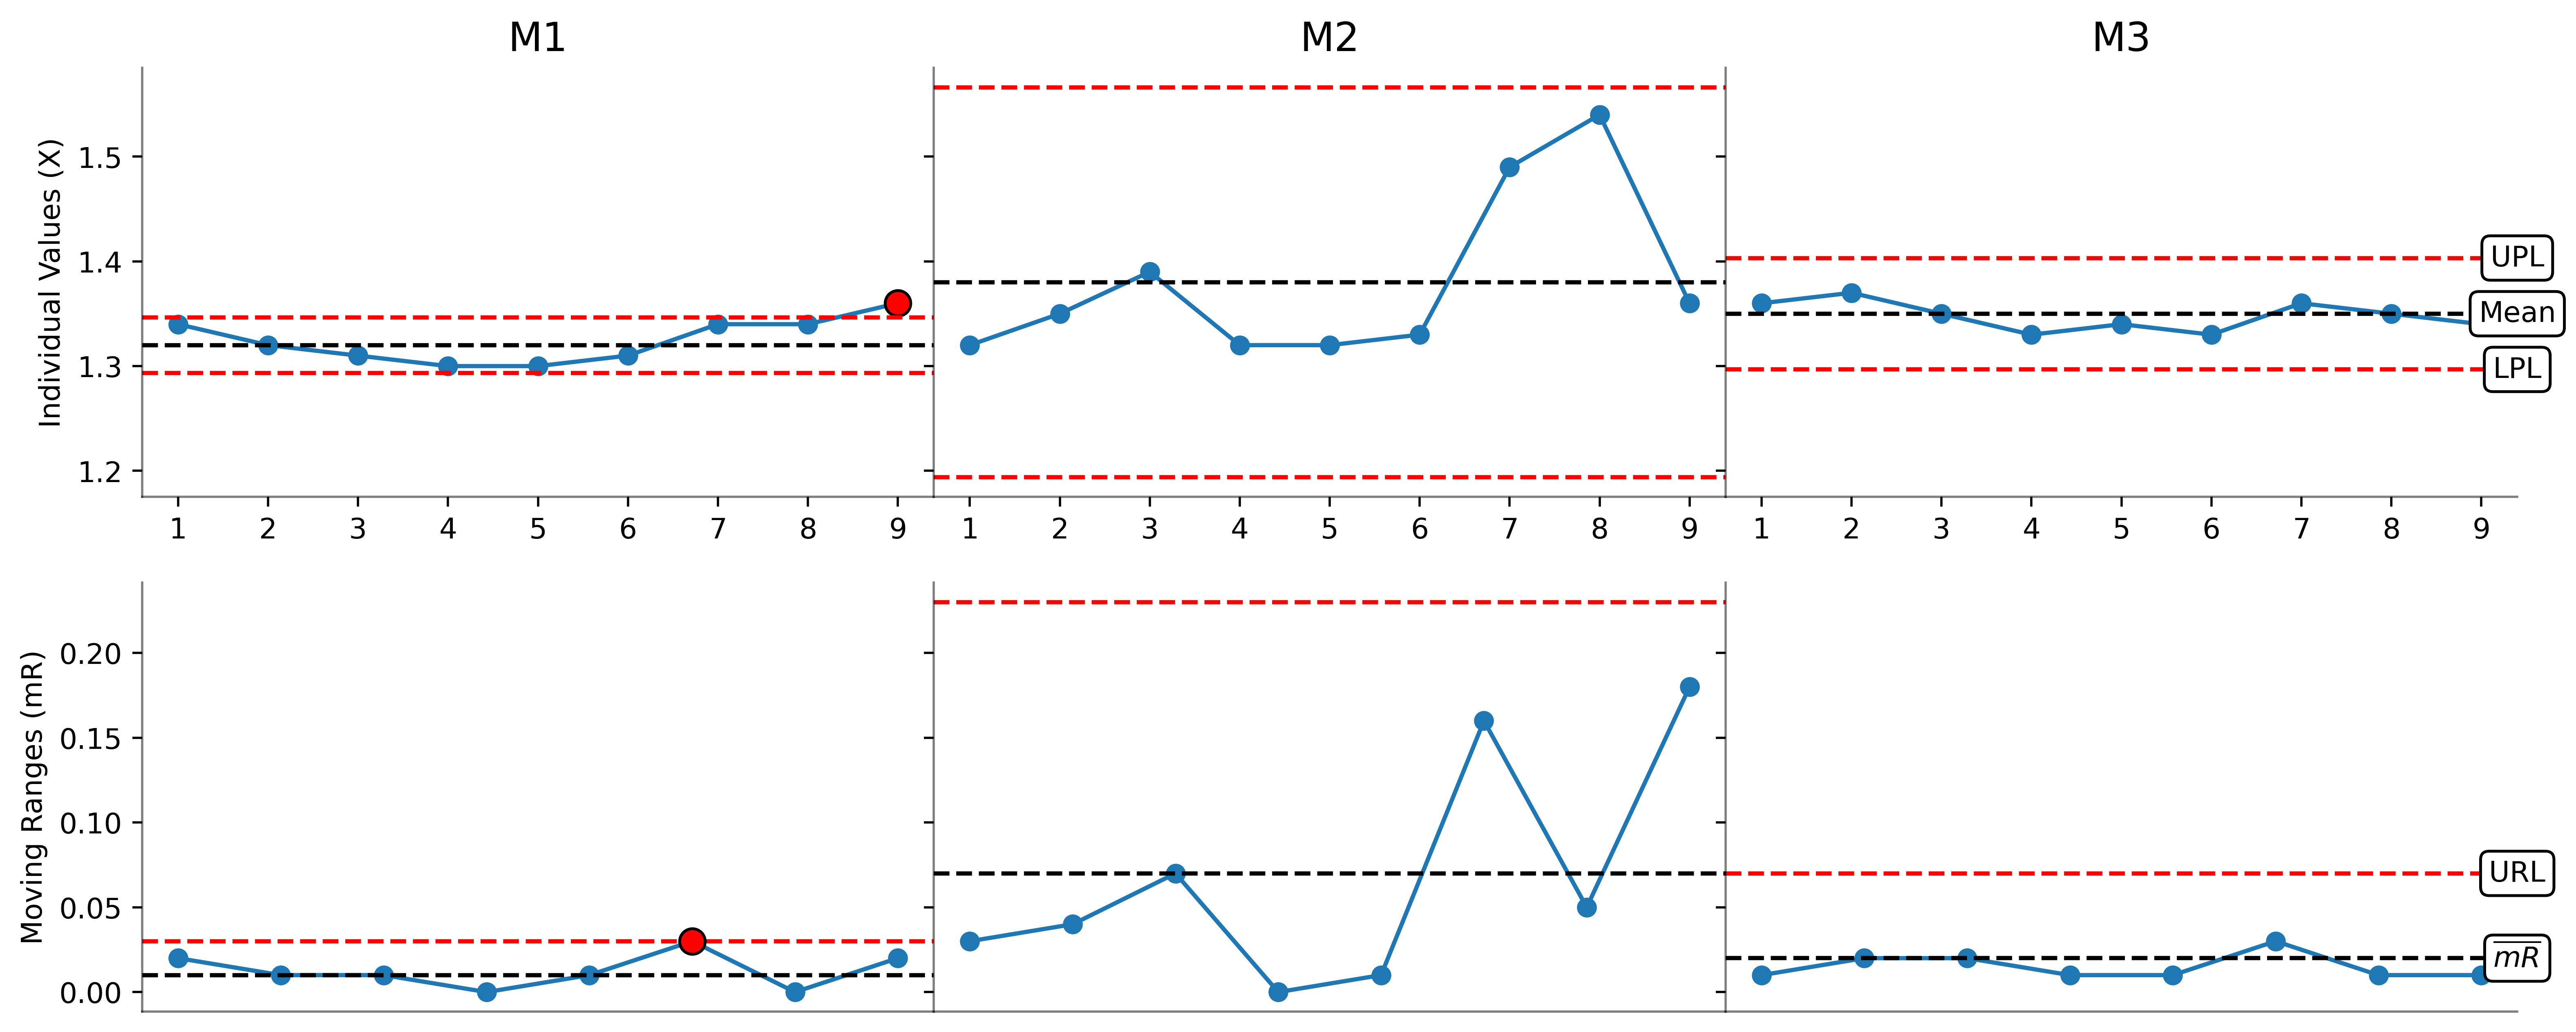

In [65]:
xmr_waviness_results = cc.xmr_comparison(machine_df_list, 
                                         'Waviness', 
                                         'Part Number',
                                         machine_df_labels, 
                                         tickinterval=1)

In [66]:
xmr_waviness_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,M1,1.32,0.01,1.3466,1.2934,0.03,0.0532,Unpredictable
1,M2,1.38,0.07,1.5662,1.1938,0.23,0.3724,Predictable
2,M3,1.35,0.02,1.4032,1.2968,0.07,0.1064,Predictable


## Fig 23.7: Bar chart of means and process limit ranges

In [67]:
xmr_waviness_results = round(xmr_waviness_results[['Label','Mean','PLR']],3)
# Transpose xchart_comparison
xmr_waviness_results_T = xmr_waviness_results.T
# Make first row column labels
xmr_waviness_results_T.columns = xmr_waviness_results_T.iloc[0]
xmr_waviness_results_T = xmr_waviness_results_T[1:]
# Stack xchart_comparison_T
xmr_waviness_results_T = (xmr_waviness_results_T
                             .stack()
                             .to_frame()
                             .reset_index()
                             .rename(columns={'level_0':'Statistic',0:'Value'})
                            )
# Show results
xmr_waviness_results_T

,Statistic,Label,Value
0,Mean,M1,1.32
1,Mean,M2,1.38
2,Mean,M3,1.35
3,PLR,M1,0.053
4,PLR,M2,0.372
5,PLR,M3,0.106


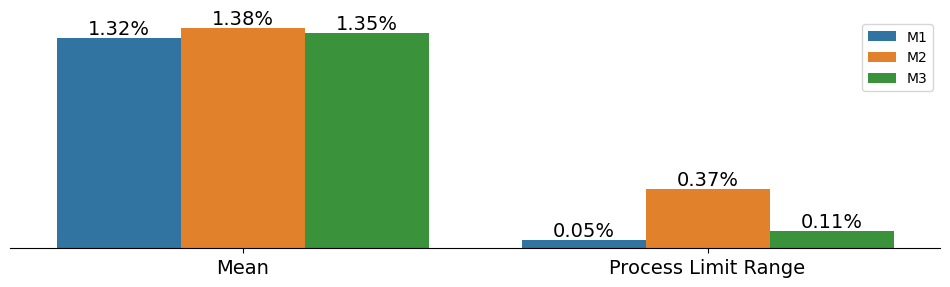

In [68]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=xmr_waviness_results_T, 
            x='Statistic', 
            y='Value', 
            hue='Label')

# Annotate each bar with its value
for container in axes.containers:
    axes.bar_label(container, fmt='%.2f%%', fontsize=14)  # Formats values to one decimal place

# Remove legend title
legend = plt.legend(title="")
# Remove axis labels
plt.xlabel('')
plt.ylabel('')
# Remove yaxis ticks
axes.yaxis.set_ticks([])
# Create new labels for xaxis
new_labels = ['Mean', 'Process Limit Range']
# Apply new labels to xaxis
axes.xaxis.set_ticklabels(new_labels, fontsize=14)
# Despine figure
sns.despine(left=True)

plt.show()